In [10]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
import statistics
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from pylab import*
from scipy import integrate
%matplotlib inline

## 1. Escriba la ecuación de difusión para el tiempo $\tau$ en coordenadas esféricas y asuma que $\tau(r,\theta,\phi)\simeq\tau(r)$ ya que por simetría esférica sólo dependerá de la posición radial respecto al centro de la gotica (Usar **LaTex**)

Tenemos que :

$\displaystyle  \begin{array}{{>{\displaystyle}l}}
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \nabla ^{2} \tau \ =\ -\ \frac{6\eta \pi a}{k_{B}\tau } \ \ \ \ \ \ \ ( 1) \ \ \ \ \ \ \\
\end{array}$

Por lo cual, 

$\displaystyle \nabla ^{2} \tau \ =\ \frac{1}{r^{2}}\frac{\partial }{\partial r}\left( r^{2}\frac{\partial \tau }{\partial r}\right) \ +\ \frac{1}{r^{2} sen\theta }\frac{\partial }{\partial \theta } \ \left( sen\theta \ \frac{\partial \tau }{\partial \theta }\right) \ +\ \frac{1}{r^{2} sen\theta }\frac{\partial ^{2} \tau }{\partial \varphi ^{2}} \ \ \ \ \ \ \ \ \ \ \ ( 2)$


$\displaystyle \nabla ^{2} \tau =\frac{1}{r^{2}}\frac{\partial }{\partial r}\left( r^{2}\frac{\partial \tau }{\partial r}\right) \ +\ 0\ +\ 0\ \ \ \ \ \ $$\displaystyle  \begin{array}{{>{\displaystyle}l}}
( 3)\\
\end{array}$


$\displaystyle -\frac{6\eta \pi a}{k_{B} \tau } \ \ =\ \frac{1}{r^{2}}\frac{\partial }{\partial r}\left( r^{2}\frac{\partial \tau }{\partial r}\right) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ( 4)$


$\displaystyle -\ \frac{6\eta \pi a}{k_{B} \tau } \ =\frac{1}{r^{2}}\left( 2r\frac{\partial \tau }{\partial r} \ +\ r^{2}\frac{\partial ^{2} \tau }{\partial r^{2}} \ \right) \ \ \ \ ( 5)$


$\displaystyle \ \ \ \ \ -\ \frac{6\eta \pi a}{k_{B} \tau } \ =\frac{\partial ^{2} \tau }{\partial r^{2}} \ +\ \frac{2\partial \tau }{r\partial r} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ( 6) \ $


$ $
$\displaystyle 0\ =\ \frac{\partial ^{2} \tau }{\partial r^{2}} \ +\ \frac{2\partial \tau }{r\partial r} \ +$$\displaystyle \frac{6\eta \pi a}{k_{B} \tau } \ \ \ \ \ \ \ \ \ ( 7) \ $




## 2. Resuelva la ecuación diferencial para el tiempo de forma numérica y grafique

Asuma las siguientes condiciones iniciales:
1. $\tau(R)=0$ ya que si el virión está en la superficie el tiempo debe ser naturalmente nulo.
1. $\tau^\prime(r)=0$ ya que por simetría la derivada radial debe ser nula en el origen

Suponga las siguientes condiciones:
- $R=5\mu m$ para el radio de la esfera de *quasi* agua (calcula el volumen $V$)
- $\eta_{\text{H}_2\text{O}}\simeq1\times10^{-3}\,Pa\cdot s$ (Pascales por segundo)
- $\frac{\eta}{\eta_{\text{H}_2\text{O}}}\approx10^3\to10^5$
- $a\simeq100\,nm$
- $V=\frac{4}{3}\pi a^3$
- $k_BT\simeq4.05\times10^{-21}J$

si:

$$
\frac{6\pi \eta a}{K_{b}T}=\frac{1}{r^{2}}\frac{d}{dr}\left ( r^{2} \frac{d \tau }{dr}\right )
$$

$$
\frac{1}{r^{2}}\left [ \left ( 2r\frac{\partial \tau }{\partial r} + r^{2}\frac{\partial ^{2}\tau }{\partial r^{2}}\right ) \right ]=\frac{1}{D}
$$


$$
\frac{2}{r}\frac{\partial \tau }{\partial r} + \frac{\partial ^{2}\tau }{\partial r^{2}}=-\frac{1}{D}
$$

$$
{y}''+2\frac{1}{x}{y}'+\frac{1}{D}=0
$$

$$
{\tau }''+\frac{2}{r}{\tau }'+\frac{1}{D}=0
$$

$$
\tau_{h} =c_{1}+\frac{c_{2}}{r} , \tau_{p} =-\frac{r^{2}}{6\times D}
$$


$$
\tau =c_{1}+\frac{c_{2}}{r}-\frac{r^{2}}{6\times D}
$$

In [4]:
a = 1*(10**(-7))
η = 1*10**(2)
R = 5*(10**(-6))
D= (4.05*10**(-21))/(6*np.pi*η*a)
N = 170

der = (R)/(N)

In [5]:

cond0 = 0
condN = 0

r = np.arange(0, R, der)

fila = np.matrix([np.array([(r[i]-der if j == i-1 and i > 0 else 0)for j in range(N)])for i in range(N) ]) 

fila = fila + np.matrix([np.array([(-2*r[i] if j == i else 0)for j in range(N)])for i in range(N) ]) 

fila = fila + np.matrix([np.array([(r[i]+der if j == i+1 and i < N-1 else 0)for j in range(N)])for i in range(N) ]) 


fila[0,:] = np.zeros(N)
fila[0,0] = 1
fila[0,1] = -1
fila[-1, -1] = 1

c = (-r*(der**2)/D)
c[0] = cond0
c[-1] = condN
c = np.matrix(c).T

T = np.array((np.linalg.inv(fila)*c).T).flatten()
ra = np.arange(0,5,5/N)
T


array([ 1.91643985e+05,  1.91643985e+05,  1.91623854e+05,  1.91590303e+05,
        1.91543332e+05,  1.91482940e+05,  1.91409127e+05,  1.91321894e+05,
        1.91221241e+05,  1.91107167e+05,  1.90979673e+05,  1.90838758e+05,
        1.90684423e+05,  1.90516667e+05,  1.90335491e+05,  1.90140895e+05,
        1.89932878e+05,  1.89711441e+05,  1.89476583e+05,  1.89228304e+05,
        1.88966606e+05,  1.88691487e+05,  1.88402947e+05,  1.88100987e+05,
        1.87785606e+05,  1.87456805e+05,  1.87114584e+05,  1.86758942e+05,
        1.86389880e+05,  1.86007397e+05,  1.85611494e+05,  1.85202170e+05,
        1.84779426e+05,  1.84343261e+05,  1.83893676e+05,  1.83430671e+05,
        1.82954245e+05,  1.82464399e+05,  1.81961132e+05,  1.81444445e+05,
        1.80914337e+05,  1.80370809e+05,  1.79813860e+05,  1.79243491e+05,
        1.78659702e+05,  1.78062492e+05,  1.77451861e+05,  1.76827811e+05,
        1.76190339e+05,  1.75539448e+05,  1.74875135e+05,  1.74197403e+05,
        1.73506250e+05,  

Text(0, 0.5, 'Eje Y')

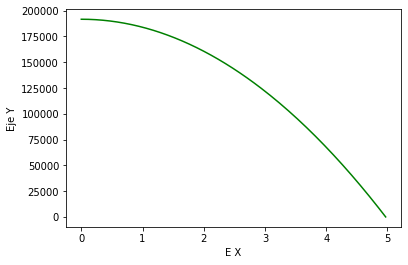

In [6]:

plt.plot(ra, T, 'g')
plt.xlabel('E X')
plt.ylabel('Eje Y')


## 3. Si los viriones están distribuidos uniformemente, encuentre el tiempo que tardaría un virión en salir de la gota de aerosol.

Tenga presente que debe promediar suponiendo que el virión tiene una distribución uniforme, i.e. $\rho\left(\vec{r}\right)=1/V$, usando la siguiente relación,
$$
\bar{\tau} = \int_{\mathcal{V}}\tau\left(\vec{r}\right)\rho\left(\vec{r}\right)\,\text{d}\vec{r} = \frac{4\pi}{V}\int_{0}^{R}\tau(r)\,r^2\text{d}r.
$$
Realice la integral numéricamente.

$$
\frac{4\pi }{V}R^{2}\left ( c_{1}\frac{R}{3}+c_{2}\frac{1}{2}+\frac{R^{3}}{30D} \right )
$$

In [9]:

a = 1*(10**(-7))
R = 5*(10**-6)
r =0.000001
V = (4/3)*(np.pi*(R**3))
n = 1000000
D= (4.05*10**(-17))/(6*np.pi*(100*(a)))

def t(r):
    return(4*np.pi/V)*((R**2/(6*D))-(1/(6*D)*r**2))*(r**2)

def  simpint(r,R,n,t):
    x, dex = np.linspace(r,R,n,retstep= True )
    return (dex/3)*(t(x[0])+2*np.sum(t(x[2:len(x)-1:2]))+ 4*np.sum(t(x[1::2]))+t(x[-1]))


valorfinal = simpint(r,R,n,t)

valorfinal

7.605601888856034

## 4. Las cadenas de Markov.

Vamos a resolver el problema anterior usando un proceso de Markov. Suponga que ud **divide** la esfera en cubitos de ancho $\delta x=\delta y=\delta z=\Delta=R/N$ con $N$ un número determinado de particiones. Para nuestro experimento, vamos a suponer que ponemos un virión en una posición inicial $\vec{r}_0=(\Delta\,j, 0, 0)$, determinada por un índice $j\in\{0,1,2,\dots,N\}$. Ud va a actualizar la posición del virión en la malla discreta siguiendo las reglas a continuación:
- Determine el número de divisiones $N$ y calcule $\Delta$.
- Ajuste la escala de tiempo $\delta t$ y de tal manera que la probabilidad $\alpha=D\frac{\delta t}{\Delta^2}<\frac{1}{6}$. (Recomiendo $\leq1/12$)
- Haga una corrida de Markov-Monte Carlo actualizando la posición con la probabilidad de transición $\alpha$ hacia los primeros vecinos cercanos y calcule el número de pasos de tiempo para llegar a la superficie, i.e. $|\vec{r}(t_m)|>R-\Delta$
- Repita este experimento para la misma posición un gran número de veces para obtener una estadística (media y desviación estándar).
- Repita todos los pasos para todos los índices $j\in\{0,1,2,\dots,N\}$ y grafique. ¡Compare con los resultados anteriores!

In [14]:
L = 2
T = 4
N = 10
dex = L/N
x = np.arange(0,L,dex)
D = 1/12
dt = 1*10**(-4)
t = np.arange(0,T,dt)
alfa = D*dt/dex*dex
assert alfa < 1/12
alfa

8.333333333333334e-06

In [12]:
def rec(n):
    global alfa
    vir = np.random.uniform(size=n)
    left = sum(vir<alfa)
    right = sum(vir<2*alfa) - left
    return (left,right)


def nueva(psi):
    npsi = np.array([actualiza_objetos(_psi) for _psi in psi]).T
    
    npsi[0,0] = 0
    npsi[1,-1] = 0
    
    npsileft = np.roll(npsi[0],-1)
    npsiright  = np.roll(npsi[1], 1)
    npsi = np.sum(npsi, axis=0)
    
    return psi+npsiright+npsileft-npsi


In [13]:
psi = np.zeros(N, dtype=np.uint32)
psi[0] = 25
psi[N//2] = 75
psi[N//3]= 100
plt.scatter(x, psi,color='m')
plt.xlabel('x')
plt.ylabel('y')



NameError: name 'x' is not defined

In [55]:
L = 2
T = 4
N = 20
dex = L/N
x = np.arange(0,L,dex)
D = 1/12
dt = 1*10**(-4)
t = np.arange(0,T,dt)
alfa = D*dt/dex*dex
assert alfa < 1/12
alfa


8.333333333333334e-06

In [56]:
def rec(n):
    global alfa
    vir = np.random.uniform(size=n)
    left = sum(vir<alfa)
    right = sum(vir<2*alfa) - left
    return (left,right)


def nueva(psi):
    npsi = np.array([actualiza_objetos(_psi) for _psi in psi]).T
    
    npsi[0,0] = 0
    npsi[1,-1] = 0
    
    npsileft = np.roll(npsi[0],-1)
    npsiright  = np.roll(npsi[1], 1)
    npsi = np.sum(npsi, axis=0)
    
    return psi+npsiright+npsileft-npsi

Text(0, 0.5, 'y')

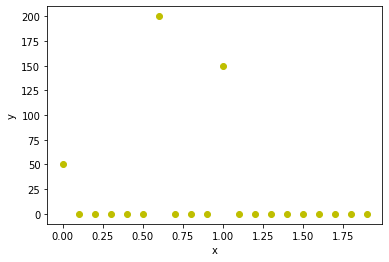

In [57]:
psi = np.zeros(N, dtype=np.uint32)
psi[0] = 50
psi[N//2] = 150
psi[N//3]= 200
plt.scatter(x, psi,color='y')
plt.xlabel('x')
plt.ylabel('y')
